In [237]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [238]:
experimentPath = r"D:\\crixodia\\OneDrive - Escuela Politécnica Nacional\\PROYECTOS_TIC\\2023B_DiseñoDesarrollo_TIC\\DesarrolloTICs\\CristianBastidas\\Experiments\\"
experimentName = "ft-u306-baseline"
experimentPath = experimentPath + f"{experimentName}\\{experimentName}.csv"
df = pd.read_csv(experimentPath)

In [239]:
def custom_report(y, pred):
    return {
        "Accuracy": accuracy_score(y, pred),
        "Precision": precision_score(y, pred, average=None), # "macro"
        "Recall": recall_score(y, pred, average=None), # "macro"
        "F1": f1_score(y, pred, average=None),  # "macro"
    }

In [240]:
y = df["actual_class"]
allAccs = dict()
allbAccs = dict()
allCfs = dict()

yDQNpred = df["dqn_predicted_class"]
yDDQNpred = df["ddqn_predicted_class"]

yPostDQNpred = df["post_dqn_predicted_class"]
yPostDDQNpred = df["post_ddqn_predicted_class"]

ccrDQN = custom_report(y, yDQNpred)
allAccs["DQN"] = ccrDQN["Accuracy"]
allCfs["DQN"] = confusion_matrix(y, yDQNpred, normalize="true")

ccrDDQN = custom_report(y, yDDQNpred)
allAccs["DDQN"] = ccrDDQN["Accuracy"]
allCfs["DDQN"] = confusion_matrix(y, yDDQNpred, normalize="true")

ccrPostDQN = custom_report(y, yPostDQNpred)
allAccs["PostDQN"] = ccrPostDQN["Accuracy"]
allCfs["PostDQN"] = confusion_matrix(y, yPostDQNpred, normalize="true")

ccrPostDDQN = custom_report(y, yPostDDQNpred)
allAccs["PostDDQN"] = ccrPostDDQN["Accuracy"]
allCfs["PostDDQN"] = confusion_matrix(y, yPostDDQNpred, normalize="true")

In [241]:
def plot_cf(cf, labels, title=""):
    df_cm = pd.DataFrame(
        cf, index=[i for i in labels.values()], columns=[i for i in labels.values()]
    )

    fig = plt.figure(figsize=(5, 3))

    heatmap = sns.heatmap(df_cm, annot=True, fmt=".2f", cmap="Blues")
    heatmap.yaxis.set_ticklabels(
        heatmap.yaxis.get_ticklabels(), rotation=0, ha="right", fontsize=10
    )
    heatmap.xaxis.set_ticklabels(
        heatmap.xaxis.get_ticklabels(), rotation=45, ha="right", fontsize=10
    )

    plt.ylabel("Actual class")
    plt.xlabel("Predicted class")
    # plt.title(title)
    plt.savefig(experimentPath.replace(".csv", title + ".png"), bbox_inches="tight")


def plot_accs(accs, title=""):
    colors = ["#efb792", "#abc9ea", "#efb792", "#abc9ea"]
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.grid(False)

    vals = list(accs.values())
    vals = [v * 100 for v in vals]

    # PostDQN = Postprocessing DQN, PostDDQN = Postprocessing DDQN, DQN = DQN, DDQN = DDQN
    labels = {
        "PostDQN": "Post-processing DQN",
        "PostDDQN": "Post-processing DDQN",
        "DQN": "DQN",
        "DDQN": "DDQN",
    }
    ylabels = [labels[i] for i in accs.keys()]

    bars = ax.barh(ylabels, vals, color=colors, label="Accuracy")

    for bar in bars:
        plt.text(
            bar.get_width(),
            bar.get_y() + bar.get_height() / 2,
            f"{bar.get_width():.2f}%",
            ha="center",
            va="center",
        )

    # plt.legend(bbox_to_anchor=(0.5, 1.15), loc="upper center", ncol=2)
    # % symbol on x ticks
    plt.xticks(np.arange(0, 110, 10), [f"{i}%" for i in range(0, 101, 10)])
    plt.xlabel("Accuracy")
    # plt.title(title)
    plt.savefig(experimentPath.replace(".csv", title + ".png"), bbox_inches="tight")


def plot_episode_rewards(dataframe):
    dqn_avg_reward = dataframe["DQNEpisodeReward"].rolling(window=150).mean()
    ddqn_avg_reward = dataframe["DDQNEpisodeReward"].rolling(window=150).mean()

    sns.set(style="whitegrid")
    sns.axes_style("ticks")

    plt.figure(figsize=(6, 3))

    # sns.lineplot(x='EpisodeIndex', y='DQNEpisodeReward', data=dataframe, label='DQN Episode Reward', alpha=0.5)
    sns.lineplot(
        x="EpisodeIndex",
        y=dqn_avg_reward,
        data=dataframe,
        label="DQN Average Reward",
    )

    # sns.lineplot(x='EpisodeIndex', y='DDQNEpisodeReward', data=dataframe, label='DDQN Episode Reward', alpha=0.5)
    sns.lineplot(
        x="EpisodeIndex",
        y=ddqn_avg_reward,
        data=dataframe,
        label="DDQN Average Reward",
    )

    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.title("DQN and DDQN Average Rewards")

    plt.legend()
    plt.savefig(experimentPath.replace(".csv", "-rewards.png"), bbox_inches="tight")

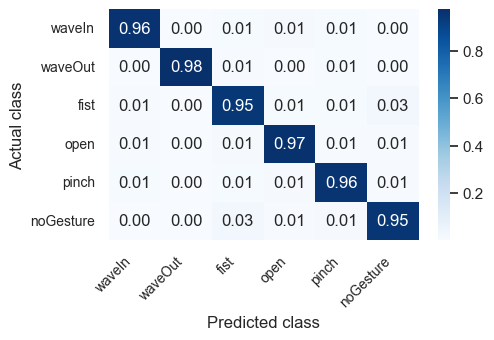

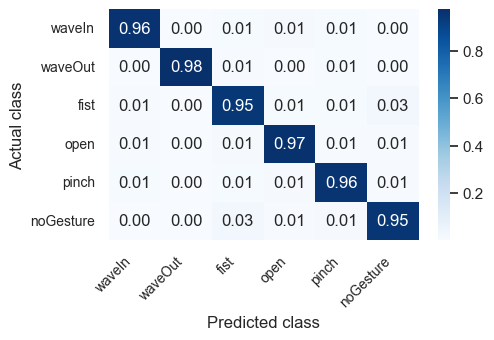

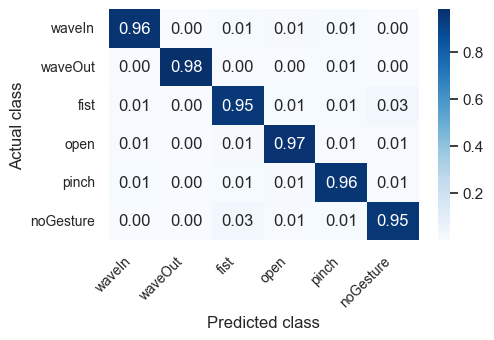

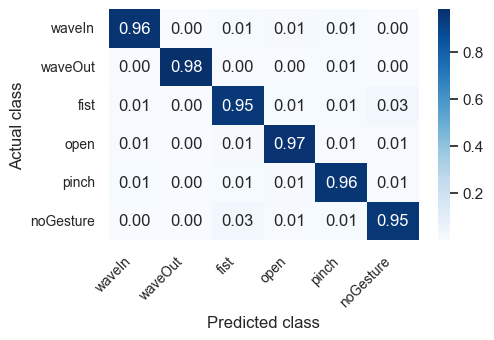

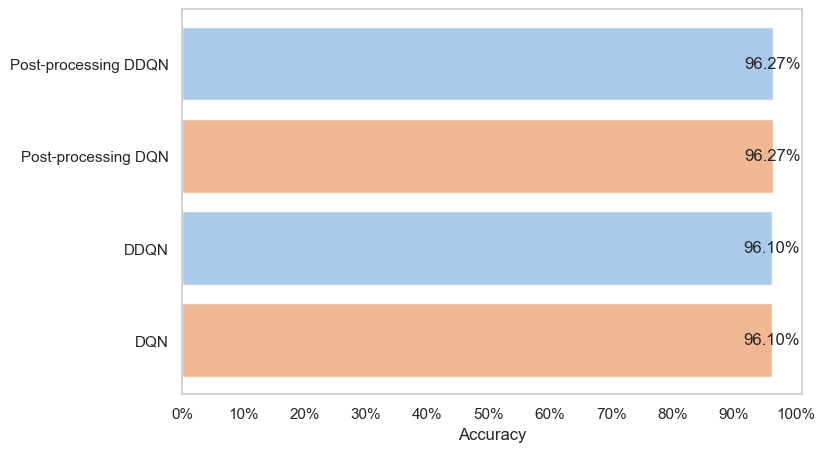

In [242]:
for k, cf in allCfs.items():
    labels = {
        1: "waveIn",
        2: "waveOut",
        3: "fist",
        4: "open",
        5: "pinch",
        6: "noGesture",
    }
    if len(cf) == 5:
        labels = {0: "waveIn", 1: "waveOut", 2: "fist", 3: "open", 4: "pinch"}
    try:
        plot_cf(cf, labels, k)
    except:
        pass

plot_accs(allAccs, "Accuracy")

In [243]:
dftp = pd.read_csv(experimentPath.replace(".csv", "-tp.csv"))
plot_episode_rewards(dftp)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\\\crixodia\\\\OneDrive - Escuela Politécnica Nacional\\\\PROYECTOS_TIC\\\\2023B_DiseñoDesarrollo_TIC\\\\DesarrolloTICs\\\\CristianBastidas\\\\Experiments\\\\ft-u306-baseline\\ft-u306-baseline-tp.csv'

C:\Users\gabri\AppData\Local\Temp\ipykernel_13128\3838886272.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dqn_recognition.rename(columns={'post_dqn_recognition':'value'}, inplace=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_13128\3838886272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dqn_recognition['Model'] = 'DQN'
C:\Users\gabri\AppData\Local\Temp\ipykernel_13128\3838886272.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

<Figure size 1000x300 with 0 Axes>

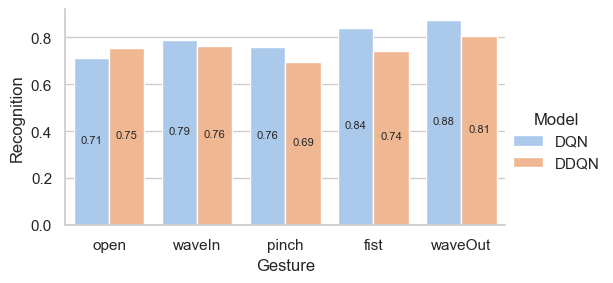

In [ ]:
df_filtered = df[df["actual_class"] != "noGesture"]

dqn_recognition = df_filtered[['actual_class', 'post_dqn_recognition']]
dqn_recognition.rename(columns={'post_dqn_recognition':'value'}, inplace=True)
dqn_recognition['Model'] = 'DQN'

ddqn_recognition = df_filtered[['actual_class', 'post_ddqn_recognition']]
ddqn_recognition.rename(columns={'post_ddqn_recognition':'value'}, inplace=True)
ddqn_recognition['Model'] = 'DDQN'

post_overall_recognition_dqn = df['post_dqn_recognition'].mean()
post_overall_recognition_ddqn = df['post_ddqn_recognition'].mean()

recognition_df = pd.concat([dqn_recognition, ddqn_recognition])

# Create a dataframe [actual_gesture, dqn_or_ddqn, recognition]
sns.set(style="whitegrid")
sns.axes_style("ticks")

plt.figure(figsize=(10,3))

g = sns.catplot(x = 'actual_class', y='value', 
            hue = 'Model',data=recognition_df, 
            kind='bar', palette='pastel', hue_order=['DQN', 'DDQN'], legend_out=True, height=3, aspect=16/9, ci=None)

ax = g.facet_axis(0,0)

for p in ax.containers:
    ax.bar_label(p, fmt='%.2f', padding=1, fontsize=8, label_type='center')

plt.xlabel("Gesture")
plt.ylabel("Recognition")
# plt.title("DQN and DDQN Recognition")
plt.savefig(experimentPath.replace(".csv", "post_rcognition.png"), bbox_inches="tight")

C:\Users\gabri\AppData\Local\Temp\ipykernel_13128\3058766498.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dqn_recognition.rename(columns={'dqn_recognition':'value'}, inplace=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_13128\3058766498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dqn_recognition['Model'] = 'DQN'
C:\Users\gabri\AppData\Local\Temp\ipykernel_13128\3058766498.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

<Figure size 1000x300 with 0 Axes>

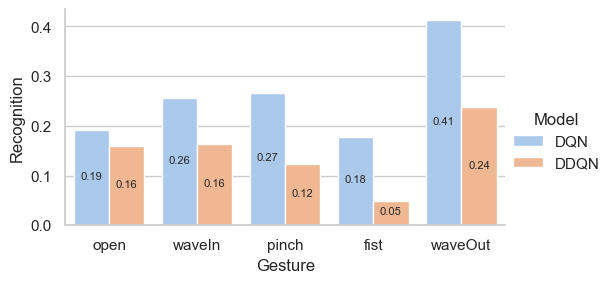

In [ ]:
df_filtered = df[df["actual_class"] != "noGesture"]

dqn_recognition = df_filtered[['actual_class', 'dqn_recognition']]
dqn_recognition.rename(columns={'dqn_recognition':'value'}, inplace=True)
dqn_recognition['Model'] = 'DQN'

ddqn_recognition = df_filtered[['actual_class', 'ddqn_recognition']]
ddqn_recognition.rename(columns={'ddqn_recognition':'value'}, inplace=True)
ddqn_recognition['Model'] = 'DDQN'

recognition_df = pd.concat([dqn_recognition, ddqn_recognition])

# Create a dataframe [actual_gesture, dqn_or_ddqn, recognition]
sns.set(style="whitegrid")
sns.axes_style("ticks")

plt.figure(figsize=(10,3))

g = sns.catplot(x = 'actual_class', y='value', 
            hue = 'Model',data=recognition_df, 
            kind='bar', palette='pastel', hue_order=['DQN', 'DDQN'], legend_out=True, height=3, aspect=16/9, ci=None)

ax = g.facet_axis(0,0)

for p in ax.containers:
    ax.bar_label(p, fmt='%.2f', padding=1, fontsize=8, label_type='center')

plt.xlabel("Gesture")
plt.ylabel("Recognition")
# plt.title("DQN and DDQN Recognition")
plt.savefig(experimentPath.replace(".csv", "rcognition.png"), bbox_inches="tight")

In [ ]:
overall_recognition_dqn = df_filtered['dqn_recognition'].mean()
overall_recognition_ddqn = df_filtered['ddqn_recognition'].mean()

overall_results = {
    "DQN_recognition": overall_recognition_dqn,
    "DDQN_recognition": overall_recognition_ddqn,
    "DQN_post_recognition": post_overall_recognition_dqn,
    "DDQN_post_recognition": post_overall_recognition_ddqn,
    "DQN_accuracy": allAccs["DQN"],
    "DDQN_accuracy": allAccs["DDQN"],
    "DQN_post_accuracy": allAccs["PostDQN"],
    "DDQN_post_accuracy": allAccs["PostDDQN"]
}

import json
with open(experimentPath.replace(".csv", "-results.json"), 'w') as f:
    json.dump(overall_results, f, indent=4)